# HUD project in Python

In [1]:
from sklearn.model_selection import train_test_split

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('HUD.xlsx')

## Data cleaning

In [3]:
df.head()

,Year,HSHD_MBR_TOTAL_CNT,NUM_BEDRM_CNT,TOTAL_DPNDNT_CNT,TOTAL_ANNL_INCM_AMNT,ADLT_AGE_18_21_CNT,ADLT_AGE_22_25_CNT,ADLT_AGE_26_35_CNT,ADLT_AGE_36_49_CNT,ADLT_AGE_50_61_CNT,...,PVRTY_PRCNT,MNRTY_PRCNT,BLACK_PRCNT,HISPANIC_PRCNT,WHITE_PRCNT,pgm_type_edited,total_annl_incm_amnt_rounded,gross_rent_amnt_rounded,asstn_pymnt_amnt_rounded,total_fmly_crbtn_amnt_rounded
0,2009,2,2,0,18948,0,0,0,0,0,...,9.539,1.400,0.000,0.306,98.600,1,18900,.,.,450
1,2009,1,1,0,4882,0,0,0,0,0,...,43.907,78.665,50.815,5.420,21.335,1,4900,.,.,100
2,2009,1,1,0,14033,0,0,0,0,1,...,12.634,6.637,0.789,1.550,93.363,1,14000,.,.,300
3,2009,1,1,0,11046,0,0,0,0,0,...,7.555,3.900,0.000,2.067,96.100,1,11000,.,.,250
4,2009,2,2,1,15172,1,0,0,1,0,...,16.914,12.439,4.282,4.201,87.561,1,15200,.,.,350


In [4]:
# Only use most recent data
df18 = df[df['Year']==2018]
df18.head()

,Year,HSHD_MBR_TOTAL_CNT,NUM_BEDRM_CNT,TOTAL_DPNDNT_CNT,TOTAL_ANNL_INCM_AMNT,ADLT_AGE_18_21_CNT,ADLT_AGE_22_25_CNT,ADLT_AGE_26_35_CNT,ADLT_AGE_36_49_CNT,ADLT_AGE_50_61_CNT,...,PVRTY_PRCNT,MNRTY_PRCNT,BLACK_PRCNT,HISPANIC_PRCNT,WHITE_PRCNT,pgm_type_edited,total_annl_incm_amnt_rounded,gross_rent_amnt_rounded,asstn_pymnt_amnt_rounded,total_fmly_crbtn_amnt_rounded
20786,2018,1,1,0,9000,0,0,0,0,1,...,36.296,34.914,6.203,21.4001,74.568,1,9000,.,.,200
20787,2018,1,1,0,8304,0,0,0,0,1,...,13.789,7.835,2.097,2.3836,93.578,1,8300,.,.,200
20788,2018,1,1,0,10547,0,0,0,0,0,...,9.035,14.039,2.003,6.1741,90.131,1,10500,.,.,250
20789,2018,1,2,0,0,0,0,0,1,0,...,30.583,3.108,0.303,0.4928,97.157,1,0,.,.,0
20790,2018,2,2,1,23652,0,0,1,0,0,...,13.797,8.839,1.558,1.8001,92.047,1,23700,.,.,500


In [5]:
df18.shape

(42415, 40)

In [6]:
df18.columns

Index(['Year', 'HSHD_MBR_TOTAL_CNT', 'NUM_BEDRM_CNT', 'TOTAL_DPNDNT_CNT',
       'TOTAL_ANNL_INCM_AMNT', 'ADLT_AGE_18_21_CNT', 'ADLT_AGE_22_25_CNT',
       'ADLT_AGE_26_35_CNT', 'ADLT_AGE_36_49_CNT', 'ADLT_AGE_50_61_CNT',
       'ADLT_AGE_62_85_CNT', 'ADLT_AGE_ABOVE85_CNT', 'DSBLD_CHLDRN_CNT',
       'HEAD_AGE_YR_CNT', 'CHLDRN_AGE_0_3_CNT', 'CHLDRN_AGE_4_5_CNT',
       'CHLDRN_AGE_6_12_CNT', 'CHLDRN_AGE_13_17_CNT', 'CHLDRN_MBR_CNT',
       'HEAD_GNDR_CD', 'HEAD_ELDLY_INDR', 'HEAD_DSBLTY_INDR', 'HEAD_RACE_CD',
       'HEAD_ETHNCY_CD', 'H6_CD', 'CHLDRN_MBR_INDR', 'CNTRL_CITY_CD',
       'GROSS_RENT_AMNT', 'ASSTN_PYMNT_AMNT', 'TOTAL_FMLY_CRBTN_AMNT',
       'PVRTY_PRCNT', 'MNRTY_PRCNT', 'BLACK_PRCNT', 'HISPANIC_PRCNT',
       'WHITE_PRCNT', 'pgm_type_edited', 'total_annl_incm_amnt_rounded',
       'gross_rent_amnt_rounded', 'asstn_pymnt_amnt_rounded',
       'total_fmly_crbtn_amnt_rounded'],
      dtype='object')

In [7]:
# Drop columns with unique identifier, redundant variables, rounded values, and financial related variables
# Leave only demographic variables
df18.drop([
    'TOTAL_ANNL_INCM_AMNT',
    'ADLT_AGE_18_21_CNT',
    'ADLT_AGE_22_25_CNT',
    'ADLT_AGE_26_35_CNT',
    'ADLT_AGE_36_49_CNT',
    'ADLT_AGE_50_61_CNT',
    'ADLT_AGE_62_85_CNT',
    'ADLT_AGE_ABOVE85_CNT',
    'CHLDRN_AGE_0_3_CNT',
    'CHLDRN_AGE_4_5_CNT',
    'CHLDRN_AGE_6_12_CNT',
    'CHLDRN_AGE_13_17_CNT',
    'H6_CD',
    'GROSS_RENT_AMNT',
    'ASSTN_PYMNT_AMNT',
    'TOTAL_FMLY_CRBTN_AMNT',
    'total_annl_incm_amnt_rounded',
    'gross_rent_amnt_rounded',
    'asstn_pymnt_amnt_rounded',
    'total_fmly_crbtn_amnt_rounded'
],
    axis = 1,
    inplace = True)

/Users/emilygee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [8]:
df18.shape

(42415, 20)

In [9]:
df18.columns

Index(['Year', 'HSHD_MBR_TOTAL_CNT', 'NUM_BEDRM_CNT', 'TOTAL_DPNDNT_CNT',
       'DSBLD_CHLDRN_CNT', 'HEAD_AGE_YR_CNT', 'CHLDRN_MBR_CNT', 'HEAD_GNDR_CD',
       'HEAD_ELDLY_INDR', 'HEAD_DSBLTY_INDR', 'HEAD_RACE_CD', 'HEAD_ETHNCY_CD',
       'CHLDRN_MBR_INDR', 'CNTRL_CITY_CD', 'PVRTY_PRCNT', 'MNRTY_PRCNT',
       'BLACK_PRCNT', 'HISPANIC_PRCNT', 'WHITE_PRCNT', 'pgm_type_edited'],
      dtype='object')

In [10]:
df18.rename(columns = {'pgm_type_edited':'HousingType'}, inplace = True)
df18.replace(to_replace='.', value=0, inplace=True)
df18.HEAD_GNDR_CD[df.HEAD_GNDR_CD == 'M'] = 0 # 0 for male
df18.HEAD_GNDR_CD[df.HEAD_GNDR_CD == 'F'] = 1 # 1 for female

/Users/emilygee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/emilygee/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/Users/emilygee/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate f

In [11]:
df18.head()

,Year,HSHD_MBR_TOTAL_CNT,NUM_BEDRM_CNT,TOTAL_DPNDNT_CNT,DSBLD_CHLDRN_CNT,HEAD_AGE_YR_CNT,CHLDRN_MBR_CNT,HEAD_GNDR_CD,HEAD_ELDLY_INDR,HEAD_DSBLTY_INDR,HEAD_RACE_CD,HEAD_ETHNCY_CD,CHLDRN_MBR_INDR,CNTRL_CITY_CD,PVRTY_PRCNT,MNRTY_PRCNT,BLACK_PRCNT,HISPANIC_PRCNT,WHITE_PRCNT,HousingType
20786,2018,1,1,0,0,59,0,1,0,1,1,2,0,1,36.296,34.914,6.203,21.4001,74.568,1
20787,2018,1,1,0,0,52,0,1,0,1,1,2,0,0,13.789,7.835,2.097,2.3836,93.578,1
20788,2018,1,1,0,0,92,0,1,1,0,1,2,0,0,9.035,14.039,2.003,6.1741,90.131,1
20789,2018,1,2,0,0,44,0,1,0,0,1,2,0,2,30.583,3.108,0.303,0.4928,97.157,1
20790,2018,2,2,1,0,27,1,1,0,0,1,2,1,1,13.797,8.839,1.558,1.8001,92.047,1


Housing classes
* 1 is public housing
* 2 is housing voucher
* 3 is multi-family housing

In [12]:
df18.HousingType.value_counts()

2    20242
3    13626
1     8547
Name: HousingType, dtype: int64

In [13]:
# Correct class imbalance
from sklearn.utils import resample

# Separate majority and minority classes
df_type2 = df18[df18.HousingType==2]
df_type3 = df18[df18.HousingType==3]
df_minority = df18[df18.HousingType==1]
 
# Downsample bigger classes
df_type2_downsampled = resample(df_type2, replace=False, n_samples=len(df_minority), random_state=98)
df_type3_downsampled = resample(df_type3, replace=False, n_samples=len(df_minority), random_state=98)
 
# Combine minority class with downsampled majority classes
df2 = pd.concat([df_minority, df_type2_downsampled, df_type3_downsampled])
 
# Display new class counts
df2.HousingType.value_counts()

3    8547
2    8547
1    8547
Name: HousingType, dtype: int64

In [14]:
df2.shape

(25641, 20)

## Splitting the data

In [15]:
features = [f for f in df2.columns if f != 'HousingType']

In [16]:
X = df2[features]
y = df2.HousingType

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=98)

In [18]:
print('Train:', X_train.shape, 'Test:', X_test.shape)

Train: (17948, 19) Test: (7693, 19)


## Logistic regression

In [19]:
logreg = LogisticRegression(random_state=98, multi_class='multinomial')

In [20]:
logreg.fit(X_train, y_train)

/Users/emilygee/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=98, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
y_pred = logreg.predict(X_test)

In [22]:
print(f'Prediction accuracy: {logreg.score(X_test, y_test):.2%}')

Prediction accuracy: 46.72%


In [23]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = [1,2,3], columns = [1,2,3])
cm_df

,1,2,3
1,1167,682,713
2,631,1308,618
3,702,753,1119


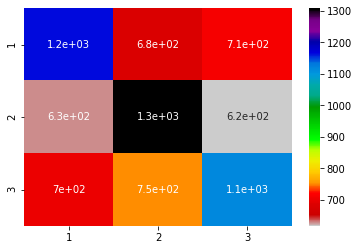

In [24]:
axes = sns.heatmap(cm_df, annot = True, cmap = 'nipy_spectral_r')

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.47      0.46      0.46      2562
           2       0.48      0.51      0.49      2557
           3       0.46      0.43      0.45      2574

    accuracy                           0.47      7693
   macro avg       0.47      0.47      0.47      7693
weighted avg       0.47      0.47      0.47      7693



## Decision tree

In [26]:
tree = DecisionTreeClassifier(random_state=98)

In [27]:
tree = tree.fit(X_train, y_train)

In [28]:
y_pred2 = tree.predict(X_test)

In [29]:
print(f'Prediction accuracy: {tree.score(X_test, y_test):.2%}')

Prediction accuracy: 48.25%


In [30]:
cm2 = confusion_matrix(y_test, y_pred2)
cm_df2 = pd.DataFrame(cm2, index = [1,2,3], columns = [1,2,3])
cm_df2

,1,2,3
1,1225,685,652
2,625,1256,676
3,673,670,1231


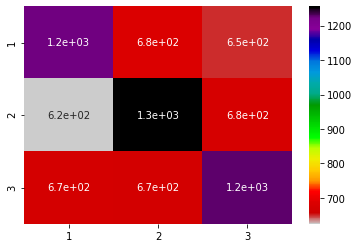

In [31]:
axes2 = sns.heatmap(cm_df2, annot = True, cmap = 'nipy_spectral_r')

In [32]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           1       0.49      0.48      0.48      2562
           2       0.48      0.49      0.49      2557
           3       0.48      0.48      0.48      2574

    accuracy                           0.48      7693
   macro avg       0.48      0.48      0.48      7693
weighted avg       0.48      0.48      0.48      7693



## Conclusion
Based on demographic information alone, it is difficult to accurately predict which type of housing a family belongs to. There may be no relation, or more qualitative research is needed to identify any preferences/trends among groups.